Interpolace a aproximace funkce jedné proměnné

Zadání:
Během měření v laboratoři získáte diskrétní sadu dat. Často potřebujete data i mezi těmito diskrétními hodnotami a to takové, které by nejpřesněji odpovídaly reálnému naměření. Proto je důležité využít vhodnou interpolační metodu. Cílem tohoto zadání je vybrat si 3 rozdílné funkce (např. polynom, harmonická funkce, logaritmus), přidat do nich šum (trošku je v každém z bodů rozkmitejte), a vyberte náhodně některé body. Poré proveďte interpolaci nebo aproximaci funkce pomocí alespoň 3 rozdílných metod a porovnejte, jak jsou přesné. Přesnost porovnáte s daty, která měla původně vyjít. Vhodnou metrikou pro porovnání přesnosti je součet čtverců (rozptylů), které vzniknou ze směrodatné odchylky mezi odhadnutou hodnotou a skutečnou hodnotou.

In [2]:
!python -m pip install pandas

     ---------------------------------------- 10.6/10.6 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 503.5/503.5 kB 3.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as p
import sympy
import math
import random
from scipy.interpolate import interp1d, lagrange

Cíl: produkovat podmnožinu bodů ze dvou polí reprezentující hodnoty x a y funkce
Vstupy: x_      - pole hodnot x
        y_      - pole hodnot y
        rand    - kolik náhodných hodnot vybrat
Výstup: x_, y_  - podmnožina hodnot x a y
Poznámka: První hodnota x a poslední hodnota x jsou koncové body intervalu x a musí být zahrnuty v náhodné množině, aby interpolační funkce fungovala správně 

In [4]:
def getRandomPoints(x_, y_, rand=0.7):
    random.seed()
    x_rand = []
    y_rand = []
    for i in range(len(x_)):
        if (i == 0 or i == len(x_) - 1 or random.random()>rand):
            x_rand.append(x_[i])
            y_rand.append(y_[i])
    
    return [x_rand, y_rand]

Cíl: Vzhledem k předpokládané funkci najdi hodnotu zbytkového součtu na druhou a r^2 pro změření přesnosti modelu
Vstupy: y_      - hodnoty y (skutečné)
        y_pred  - hodnoty y (předpokládané)
Výstup: RSS     - residual sum squared (zbytkový součet na druhou)
        r^2     - 1 - RSS/TSS

In [5]:
def calculateError(y_, y_pred):
    RSS = 0
    TSS = 0
    y_mean = np.mean(y_)
    for i in range(len(y_)):
        RSS += (y_pred[i] - y_[i])**2
        TSS += (y_pred[i] - y_mean)**2
    
    return (1 - RSS/TSS)

Vytvoř data funkce

In [6]:
x_vals = np.linspace(0.1,3,100)

noise = 0.7

#Kvadratická funkce se šumem
y_quad = [x**2 + random.random()*noise*(-1)**random.randrange(1,2) for x in x_vals]

#Logaritmická funkce se šumem
y_log = [math.log(x) + random.random()*noise*(-1)**random.randrange(1,2) for x in x_vals]

Vyber náhodné body

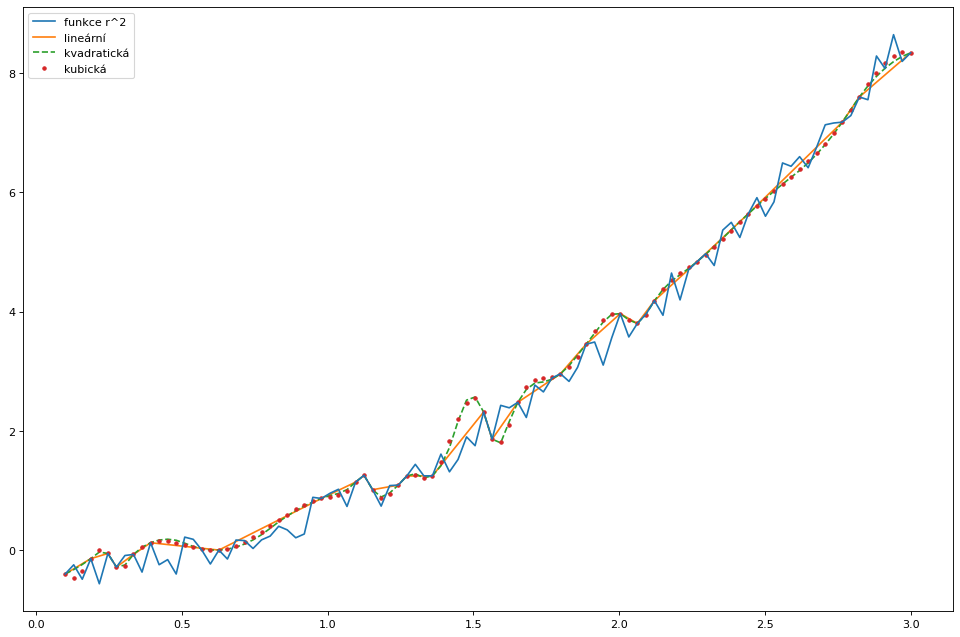

In [7]:
x_rand, y_rand = getRandomPoints(x_vals, y_quad)

#lineární, kvadratická a kubická interpolace
f1 = interp1d(x_rand, y_rand, kind='linear')(x_vals)
f2 = interp1d(x_rand, y_rand, kind='quadratic')(x_vals)
f3 = interp1d(x_rand, y_rand, kind='cubic')(x_vals)

#chyba r^2
r_lin = calculateError(y_quad, f1)
r_quad = calculateError(y_quad, f2)
r_cube = calculateError(y_quad, f3)

plt.figure(figsize=(15, 10), dpi=80)
plt.plot(x_vals, y_quad, zorder=20, label='y=x^2')
plt.plot(x_vals, f1, '-')
plt.plot(x_vals, f2, '--')
plt.plot(x_vals, f3, '.')
plt.legend(['funkce r^2' , 'lineární', 'kvadratická', 'kubická'], loc='best')
plt.show()

In [8]:
print("lineární r^2: ", r_lin)
print("kvadratická r^2: ", r_quad)
print("kubická r^2: ", r_cube)

lineární r^2:  0.9932250477800404
kvadratická r^2:  0.9902919542215138
kubická r^2:  0.9901549934818381


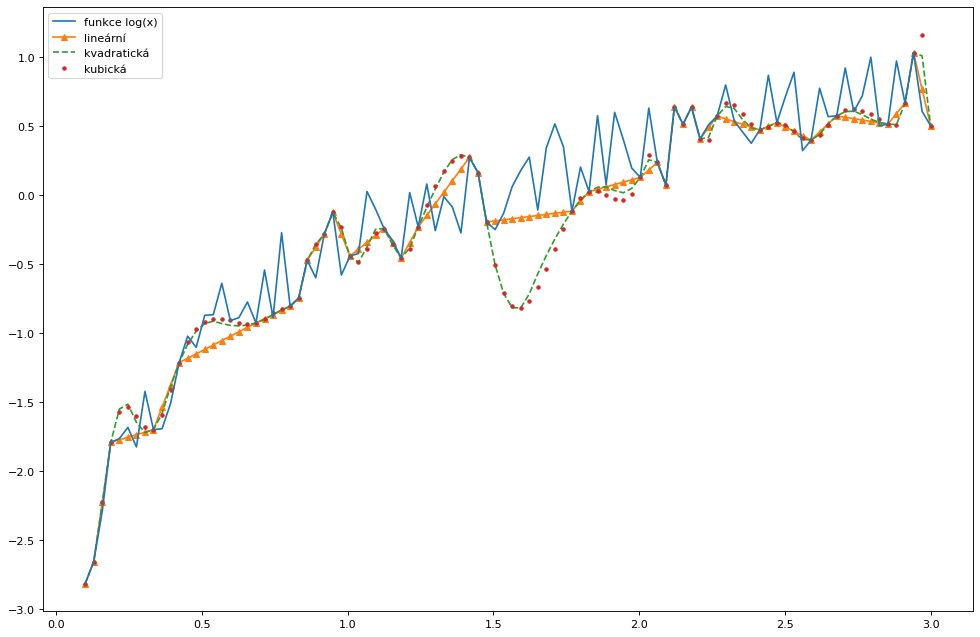

In [9]:
x_rand, y_rand = getRandomPoints(x_vals, y_log)

#Lineární, kvadratická a kubická interpolace
f1 = interp1d(x_rand, y_rand, kind='linear')(x_vals)
f2 = interp1d(x_rand, y_rand, kind='quadratic')(x_vals)
f3 = interp1d(x_rand, y_rand, kind='cubic')(x_vals)

#chyba r^2 
r_lin = calculateError(y_log, f1)
r_quad = calculateError(y_log, f2)
r_cube = calculateError(y_log, f3)

plt.figure(figsize=(15, 10), dpi=80)
plt.plot(x_vals, y_log, zorder=20, label='y=x^2')
plt.plot(x_vals, f1, '-^')
plt.plot(x_vals, f2, '--')
plt.plot(x_vals, f3, '.')
plt.legend(['funkce log(x)' , 'lineární', 'kvadratická', 'kubická'], loc='best')
plt.show()

In [10]:
print("Lineární r^2: ", r_lin)
print("kvadratická r^2: ", r_quad)
print("kubická r^2: ", r_cube)

Lineární r^2:  0.9224341706639038
kvadratická r^2:  0.8594234084025707
kubická r^2:  0.8490875371061053
